## Import package

In [1]:
import warnings
warnings.filterwarnings("ignore")
    
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE

## Load dataset: Train

In [2]:
train = pd.read_csv("../../../../data/train/train.csv")
test = pd.read_csv("../../../../data/test/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(9557, 143)
(23856, 142)


In [4]:
train.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
test.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
f = open("../../resources/continuousFeatures", "r")
continuous_columns = f.read().split(",")
f.close()

f = open("../../resources/categoricalFeatures", "r")
categorical_columns = f.read().split(",")
f.close()

print("Number of numerical columns: {0}".format(len(continuous_columns)))
print("Number of categorical columns: {0}".format(len(categorical_columns)))

Number of numerical columns: 38
Number of categorical columns: 102


In [7]:
category, category_ount = np.unique(train["Target"], return_counts=True)
print("(Category, Count): {0}".format(zip(category, category_ount)))

(Category, Count): [(1, 755), (2, 1597), (3, 1209), (4, 5996)]


## Fill Nan values

In [8]:
null_columns = train.isnull().any()

In [9]:
train.columns[train.isnull().any()].tolist() ## continuous variables

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

## Train - Validation split

In [10]:
X_train, X_validation, y_train, y_validation = train_test_split(train[categorical_columns], train["Target"], test_size=0.2, stratify=train["Target"])

In [11]:
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

((7645, 102), (7645,))
((1912, 102), (1912,))


In [12]:
category, category_count = np.unique(y_train, return_counts=True)
print("(Category, Count): {0}".format(zip(category, category_count)))
      
category, category_count = np.unique(y_validation, return_counts=True)
print("(Category, Count): {0}".format(zip(category, category_count)))

(Category, Count): [(1, 604), (2, 1278), (3, 967), (4, 4796)]
(Category, Count): [(1, 151), (2, 319), (3, 242), (4, 1200)]


## K Neighbors Classifier function

In [13]:
def kNN_prediction(n_neighbor, X_train, y_train, X_test):
    nearest_neighbors = KNeighborsClassifier(n_neighbors=n_neighbor)
    model = nearest_neighbors.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

In [14]:
def all_score(y_true, y_prediction):
    accuracy = accuracy_score(y_true, y_prediction)
    precision = precision_score(y_true, y_prediction, average="micro")
    recall = recall_score(y_true, y_prediction, average="micro")
    f1 = f1_score(y_true, y_prediction, average="micro")
    return accuracy, precision, recall, f1

In [15]:
def print_score(accuracy, precision, recall, f1):
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)

## Classification: KNeighborsClassifier

In [16]:
prediction_train, prediction_validation = kNN_prediction(5, X_train, y_train, X_validation)

In [17]:
accuracy, precision, recall, f1 = all_score(y_validation, prediction_validation)
print_score(accuracy, precision, recall, f1)

('Accuracy:', 0.733786610878661)
('Precision:', 0.733786610878661)
('Recall:', 0.733786610878661)
('F1:', 0.733786610878661)


In [18]:
confusion_mc = confusion_matrix(y_validation, prediction_validation)
print confusion_mc

[[  73   22   10   46]
 [  12  162   20  125]
 [  13   30   88  111]
 [   9   70   41 1080]]


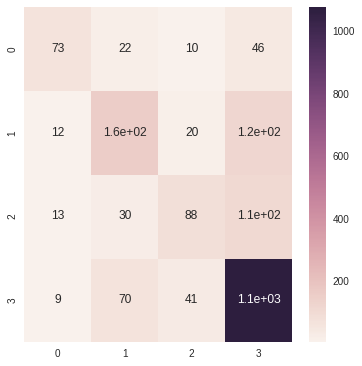

In [19]:
# convert to a dataframe
df_cm = pd.DataFrame(confusion_mc,
                     index = [i for i in range(0,4)],
                     columns = [i for i in range(0,4)])
# plot graph
plt.figure(figsize=(6,6)) # define graph
sns.heatmap(df_cm, annot=True) # draw heatmap, add annotation

In [20]:
unique_elements, counts_elements = np.unique(prediction_validation, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 2 3 4]
[ 107  284  159 1362]


## Balanced datasets - ADASYN

In [21]:
ada = ADASYN()
X_ada, y_ada = ada.fit_sample(train[categorical_columns], train["Target"])

print(X_ada.shape, y_ada.shape)

X_ada_train, X_ada_validation, y_ada_train, y_ada_validation = train_test_split(X_ada, y_ada, test_size=0.2, stratify=y_ada)

prediction_ada_train, prediction_ada_validation = kNN_prediction(5, X_ada_train, y_ada_train, X_ada_validation)

((23842, 102), (23842,))


/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 14:57:09.536574. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [22]:
accuracy, precision, recall, f1 = all_score(y_ada_validation, prediction_ada_validation)
print_score(accuracy, precision, recall, f1)

('Accuracy:', 0.669532396728874)
('Precision:', 0.669532396728874)
('Recall:', 0.669532396728874)
('F1:', 0.669532396728874)


/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 14:59:34.662928. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


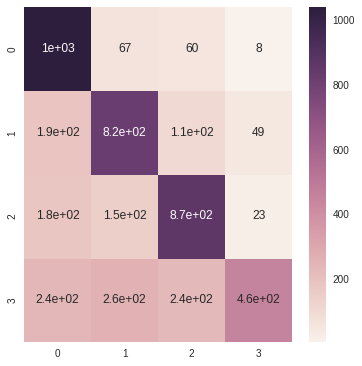

/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 14:59:34.677304. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [23]:
confusion_mc = confusion_matrix(y_ada_validation, prediction_ada_validation)
# print confusion_mc

# convert to a dataframe
df_cm = pd.DataFrame(confusion_mc,
                     index = [i for i in range(0,4)],
                     columns = [i for i in range(0,4)])
# plot graph
plt.figure(figsize=(6,6)) # define graph
sns.heatmap(df_cm, annot=True) # draw heatmap, add annotation

## Balanced datasets - SMOTE

In [24]:
smo = SMOTE(kind="svm")
X_resampled, y_resampled = smo.fit_sample(train[categorical_columns], train["Target"])

X_smo_train, X_smo_validation, y_smo_train, y_smo_validation = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)

prediction_smo_train, prediction_smo_validation = kNN_prediction(5, X_smo_train, y_smo_train, X_smo_validation)

/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 14:59:35.053129. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [25]:
accuracy, precision, recall, f1 = all_score(y_smo_validation, prediction_smo_validation)
print_score(accuracy, precision, recall, f1)

('Accuracy:', 0.8565770273087346)
('Precision:', 0.8565770273087346)
('Recall:', 0.8565770273087346)
('F1:', 0.8565770273087345)


/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 15:02:24.945104. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


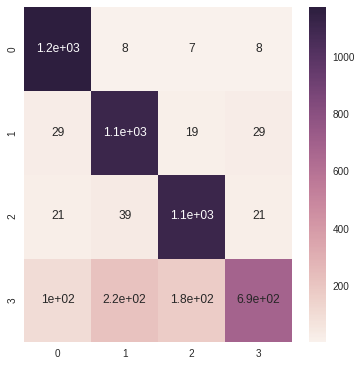

/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 15:02:24.960006. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [26]:
confusion_mc = confusion_matrix(y_smo_validation, prediction_smo_validation)
# print confusion_mc

# convert to a dataframe
df_cm = pd.DataFrame(confusion_mc,
                     index = [i for i in range(0,4)],
                     columns = [i for i in range(0,4)])
# plot graph
plt.figure(figsize=(6,6)) # define graph
sns.heatmap(df_cm, annot=True) # draw heatmap, add annotation

## Hyper-parameters tuning

In [27]:
n_neighbors = range(1, 21)
f1_scores = {"train": [], "validation": []}
print("Number of neighbor: "),
for n_neighbor in n_neighbors:
    print("Number of neighbor: {0}".format(n_neighbor))
    prediction_smo_train, prediction_smo_validation = kNN_prediction(n_neighbor, X_smo_train, y_smo_train, X_smo_validation)
    accuracy, precision, recall, f1 = all_score(y_smo_train, prediction_smo_train)
    f1_scores["train"].append(f1)    
    accuracy, precision, recall, f1 = all_score(y_smo_validation, prediction_smo_validation)
    f1_scores["validation"].append(f1)

Number of neighbor:  Number of neighbor: 1
Number of neighbor: 2
Number of neighbor: 3
Number of neighbor: 4
Number of neighbor: 5
Number of neighbor: 6
Number of neighbor: 7
Number of neighbor: 8
Number of neighbor: 9
Number of neighbor: 10
Number of neighbor: 11
Number of neighbor: 12
Number of neighbor: 13
Number of neighbor: 14
Number of neighbor: 15
Number of neighbor: 16
Number of neighbor: 17
Number of neighbor: 18
Number of neighbor: 19
Number of neighbor: 20


/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 15:02:25.271240. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


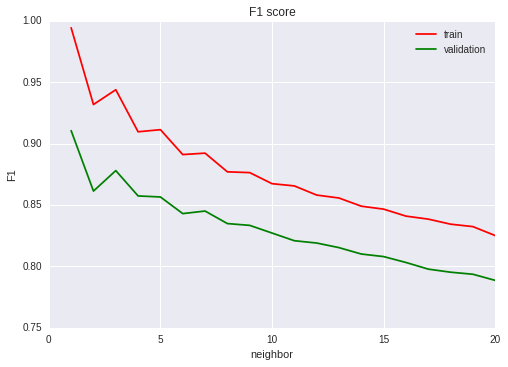

/home/mahjoubi/anaconda2/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-08-29 15:40:48.386494. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [29]:
plt.plot(n_neighbors, f1_scores["train"], c="r", label="train")
plt.plot(n_neighbors, f1_scores["validation"], c="g", label="validation")
plt.title("F1 score")
plt.xlabel("neighbor")
plt.ylabel("F1")
plt.legend()

In [ ]:
nearest_neighbors = KNeighborsClassifier(n_neighbors=1)
model = nearest_neighbors.fit(X_smo_train, y_smo_train)
prediction_smo_validation = model.predict(X_smo_validation)


# print confusion_mc

# convert to a dataframe
df_cm = pd.DataFrame(confusion_mc,
                     index = [i for i in range(0,4)],
                     columns = [i for i in range(0,4)])
# plot graph
plt.figure(figsize=(6,6)) # define graph
sns.heatmap(df_cm, annot=True) # draw heatmap, add annotation

In [ ]:
prediction_kaggle = model.predict(test[categorical_columns])

In [ ]:
unique_elements, counts_elements = np.unique(prediction_kaggle, return_counts=True)
print(unique_elements)
print(counts_elements)

In [ ]:
id_kaggle = test["Id"]

In [ ]:
d = {"Id": id_kaggle, "Target": prediction_kaggle}
data = pd.DataFrame(d)

In [ ]:
data.head(5)

In [ ]:
data.to_csv("/home/mahjoubi/Documents/github/costa_rican_household_poverty/submission/sklearn/smote/kNearestNeighbhors.csv", index=False)